# 데이터 준비

In [154]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/creditcard.zip

--2022-01-07 12:08:43--  https://github.com/dhrim/deep_learning_data/raw/master/creditcard.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/creditcard.zip [following]
--2022-01-07 12:08:43--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/creditcard.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68750451 (66M) [application/zip]
Saving to: ‘creditcard.zip’

creditcard.zip      100%[===================>]  65.57M   327MB/s    in 0.2s    

2022-01-07 12:08:46 (327 MB/s) - ‘creditcard.zip’ saved [68750451/68750451]



In [156]:
!unzip creditcard.zip

Archive:  creditcard.zip
  inflating: creditcard.csv          


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩

In [158]:
df = pd.read_csv("creditcard.csv")

In [159]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [160]:
print(len(df))

284807


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [103]:
df.Class.unique()

array([0, 1])

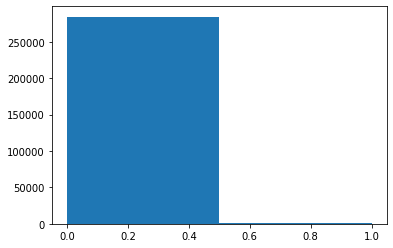

In [104]:
plt.hist(df.Class, bins=2)
plt.show()

In [105]:
df = df.sample(frac=1)

# train / test 데이터 분리

In [106]:
class1_df = df[df.Class==1]
class1_count = len(class1_df)
print(class1_count)

492


In [116]:
class0_df = df[df.Class==0]
print(len(class0_df))

284315


In [117]:
class0_test_df = class0_df.iloc[class0_df.index<=class1_count]
class0_df.drop(class0_test_df.index, inplace=True)
print(len(class0_test_df))
print(len(class0_df))

493
283822


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [118]:
train_df = class0_df
print(len(train_df))
test_df = class1_df.append(class0_test_df)
print(len(test_df))

283822
985


# numpy로 변환

In [119]:
train_df.drop(columns=["Time", "Class"], inplace=True)
print(train_df.head())

              V1        V2        V3  ...       V27       V28  Amount
78127   1.085894  0.189881 -0.093894  ... -0.013872  0.004306   45.90
118838  1.197395 -0.266735  0.552402  ... -0.071112 -0.008616    1.46
158913  1.576920 -0.483123 -3.885340  ... -0.023077  0.004266  234.18
106245  0.976227 -0.257816  0.408275  ...  0.039447 -0.010706   20.32
198029 -0.801287 -0.355584  0.997339  ... -0.243336  0.023658   15.00

[5 rows x 29 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [120]:
train_data = train_df.to_numpy()
print(train_data.shape)

(283822, 29)


In [121]:
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
204503,135314.0,-3.158990,1.765452,-3.390168,0.987410,-1.509930,-1.280952,-2.719557,0.718325,-1.660183,-3.841098,3.282825,-3.906877,0.951368,-4.898183,-0.552000,-4.787448,-9.334329,-2.580249,1.501573,-0.022590,1.120533,1.605085,-0.618637,-0.251283,-0.240528,-0.004327,-0.235477,0.018129,84.28,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
241254,150949.0,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,-3.508925,1.439322,-1.959927,0.767485,-4.978118,1.058566,-0.997477,-0.817261,0.307798,0.028485,0.353898,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,9.29,1
9179,13126.0,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,10.446847,-15.479052,0.734442,-13.883779,0.821440,-11.911483,-18.103004,-6.837835,3.126929,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.00,1


In [122]:
test_y = test_df.Class.to_numpy()
print(test_y.shape)
print(test_y[:10])

(985,)
[1 1 1 1 1 1 1 1 1 1]


In [123]:
test_df.drop(columns=["Time", "Class"], inplace=True)
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
204503,-3.158990,1.765452,-3.390168,0.987410,-1.509930,-1.280952,-2.719557,0.718325,-1.660183,-3.841098,3.282825,-3.906877,0.951368,-4.898183,-0.552000,-4.787448,-9.334329,-2.580249,1.501573,-0.022590,1.120533,1.605085,-0.618637,-0.251283,-0.240528,-0.004327,-0.235477,0.018129,84.28
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6331,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00
241254,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,-3.508925,1.439322,-1.959927,0.767485,-4.978118,1.058566,-0.997477,-0.817261,0.307798,0.028485,0.353898,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,9.29
9179,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,10.446847,-15.479052,0.734442,-13.883779,0.821440,-11.911483,-18.103004,-6.837835,3.126929,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.00


In [124]:
test_data = test_df.to_numpy()
print(test_data.shape)
print(test_data[0])

(985, 29)
[-3.15898973e+00  1.76545162e+00 -3.39016805e+00  9.87409979e-01
 -1.50993037e+00 -1.28095213e+00 -2.71955697e+00  7.18324817e-01
 -1.66018324e+00 -3.84109815e+00  3.28282461e+00 -3.90687695e+00
  9.51367704e-01 -4.89818303e+00 -5.51999609e-01 -4.78744842e+00
 -9.33432947e+00 -2.58024866e+00  1.50157346e+00 -2.25898632e-02
  1.12053279e+00  1.60508519e+00 -6.18637378e-01 -2.51282997e-01
 -2.40527822e-01 -4.32675619e-03 -2.35477311e-01  1.81292220e-02
  8.42800000e+01]


# Normalize

In [125]:
maxs = train_data.max(axis=0)
print(maxs)
mins = train_data.min(axis=0)
print(mins)

[2.45492999e+00 1.89024528e+01 9.38255843e+00 1.68753440e+01
 3.48016659e+01 7.33016255e+01 1.20589494e+02 1.87092545e+01
 1.55949946e+01 2.37451361e+01 1.00021902e+01 7.84839208e+00
 7.12688296e+00 1.05267661e+01 8.87774160e+00 1.73151115e+01
 9.25352625e+00 5.04106919e+00 5.59197143e+00 3.94209042e+01
 2.26148894e+01 1.05030901e+01 2.25284117e+01 4.58454914e+00
 7.51958868e+00 3.51734561e+00 3.16121981e+01 3.38478078e+01
 2.56911600e+04]
[ -56.40750963  -72.71572756  -48.32558936   -5.6831712  -113.74330671
  -26.16050594  -31.76494649  -73.21671846   -6.29073039  -14.74109638
   -4.79747346  -15.14498822   -5.79188121  -18.3920915    -4.39130707
  -10.11555995  -17.09844421   -5.36665996   -7.21352743  -54.49772049
  -34.83038214  -10.9331437   -44.8077352    -2.83662692  -10.29539707
   -2.60455055  -22.56567932  -15.43008391    0.        ]


In [126]:
train_x = (train_data - mins) / (maxs - mins)
print(train_x[:2])

[[9.76741777e-01 7.95754823e-01 8.35786576e-01 3.03267626e-01
  7.65926396e-01 2.57973897e-01 2.10746679e-01 7.96365806e-01
  2.68429599e-01 3.89415615e-01 4.24915647e-01 6.71736036e-01
  3.31025544e-01 6.73414949e-01 3.56310747e-01 3.59301290e-01
  6.43322851e-01 4.94542392e-01 5.27596341e-01 5.78325926e-01
  6.08162502e-01 5.18718086e-01 6.63609583e-01 4.10294217e-01
  6.14557357e-01 3.79537761e-01 4.16254903e-01 3.13211242e-01
  1.78660676e-03]
 [9.78636042e-01 7.90770921e-01 8.46985970e-01 2.42616012e-01
  7.60852935e-01 2.60245695e-01 2.05037299e-01 7.99031920e-01
  3.07410687e-01 3.82282509e-01 4.15216988e-01 6.55389924e-01
  2.94355407e-01 6.62108986e-01 4.08146269e-01 3.83541581e-01
  6.40420056e-01 5.03673437e-01 5.61318355e-01 5.77960292e-01
  6.04956981e-01 4.95505591e-01 6.67495478e-01 3.85652891e-01
  5.74939340e-01 5.76318649e-01 4.15198388e-01 3.12949010e-01
  5.68288859e-05]]


In [128]:
test_x = (test_data - mins) / (maxs - mins)
print(test_x[:2])

[[0.90462645 0.81295196 0.77866684 0.29570125 0.7555515  0.25014097
  0.19064354 0.80428894 0.21157842 0.28321812 0.54597849 0.4887542
  0.52197322 0.46661278 0.28934308 0.19423919 0.29463128 0.26772519
  0.68057488 0.58002479 0.62582897 0.5849082  0.65624631 0.34837388
  0.56440512 0.42474157 0.41216458 0.31349176 0.00328051]
 [0.88357763 0.80850869 0.79248333 0.3707229  0.75812176 0.24586211
  0.18554595 0.79376849 0.27611434 0.25826012 0.65496878 0.18406032
  0.46260252 0.40184834 0.3303915  0.10052531 0.17076619 0.02259007
  0.58739308 0.57843812 0.61630758 0.51828654 0.65895556 0.3750248
  0.5920747  0.31804897 0.40124391 0.33036432 0.00229651]]


# 모델 학습

In [129]:
feature_count = train_x.shape[1]
print(feature_count)

29


In [79]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [81]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=feature_count))
model.add(Dense(5, activation='relu'))
model.add(Dense(15, activation='relu'))
# model.add(Dense(feature_count, activation='sigmoid'))
model.add(Dense(feature_count))

model.compile(optimizer='Adam', loss='mae', metrics=["mape"])

hist = model.fit(train_x, train_x, epochs=100, batch_size=256, validation_split=0.1)

Epoch 1/100
998/998 [==============================] - 4s 3ms/step - loss: 0.0579 - mape: 1898.2031 - val_loss: 0.0261 - val_mape: 3255.5005
Epoch 2/100
998/998 [==============================] - 3s 3ms/step - loss: 0.0258 - mape: 1699.4807 - val_loss: 0.0257 - val_mape: 3415.7776
Epoch 3/100
998/998 [==============================] - 3s 3ms/step - loss: 0.0255 - mape: 1701.3579 - val_loss: 0.0254 - val_mape: 3010.3796
Epoch 4/100
998/998 [==============================] - 3s 3ms/step - loss: 0.0251 - mape: 1702.0872 - val_loss: 0.0248 - val_mape: 3288.9402
Epoch 5/100
998/998 [==============================] - 3s 3ms/step - loss: 0.0242 - mape: 1642.3387 - val_loss: 0.0238 - val_mape: 3127.8665
Epoch 6/100
998/998 [==============================] - 3s 3ms/step - loss: 0.0234 - mape: 1597.4661 - val_loss: 0.0233 - val_mape: 2940.6392
Epoch 7/100
998/998 [==============================] - 3s 3ms/step - loss: 0.0230 - mape: 1599.6244 - val_loss: 0.0229 - val_mape: 3051.5830
Epoch 8/100
9

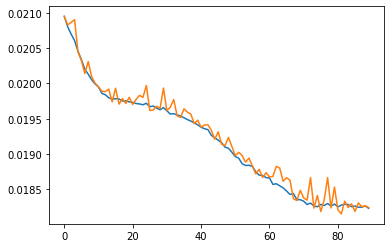

In [82]:
plt.plot(hist.history['loss'][10:])
plt.plot(hist.history['val_loss'][10:])
plt.show()

In [83]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  

hist = model.fit(train_x, train_x, epochs=400, batch_size=256, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0183 - mape: 1757.0599 - val_loss: 0.0184 - val_mape: 3306.8098
Epoch 2/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0182 - mape: 1763.1544 - val_loss: 0.0184 - val_mape: 3360.9009
Epoch 3/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0183 - mape: 1764.4191 - val_loss: 0.0184 - val_mape: 3473.7314
Epoch 4/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0183 - mape: 1758.9261 - val_loss: 0.0183 - val_mape: 3337.8521
Epoch 5/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0183 - mape: 1760.1036 - val_loss: 0.0183 - val_mape: 3469.2849
Epoch 6/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0182 - mape: 1761.9994 - val_loss: 0.0184 - val_mape: 3304.5024
Epoch 7/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0183 - mape: 1753.8011 - val_loss: 0.0183 - val_mape: 3389.9275
Epoch 8/400
9

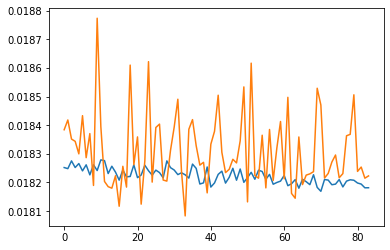

In [84]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

# 탐지 실행

## threshold 구하기

In [131]:
reconstructed = model.predict(train_x)

train_mae = np.mean(np.abs(reconstructed - train_x), axis=-1)
print(train_mae)

[0.00952263 0.01307626 0.01498238 ... 0.01186145 0.02097372 0.02569357]


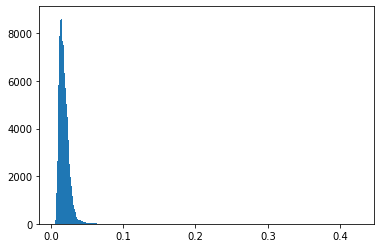

In [132]:
plt.hist(train_mae, bins=1000)
plt.show()

In [133]:
sorted_mae = np.sort(train_mae)
threshold_index = int(len(sorted_mae)*0.99)
threshold = sorted_mae[threshold_index]

print(threshold)

0.042472197176932326


## 테스트 데이터 모델 예측

In [ ]:
reconstructed = model.predict(test_x)
test_mae = np.mean(np.abs(reconstructed - test_x), axis=-1)

half_index = int(len(test_mae)*0.5)
plt.hist(test_mae[:half_index], bins=100, alpha=0.5)
plt.hist(test_mae[half_index:], bins=100, alpha=0.5)
plt.show()

In [145]:
predicted = (mae > threshold).astype(np.int)

n = len(test_data)
accuracy = (predicted == test_y).sum() / n

print("accuracy=", accuracy)

accuracy= 0.8984771573604061


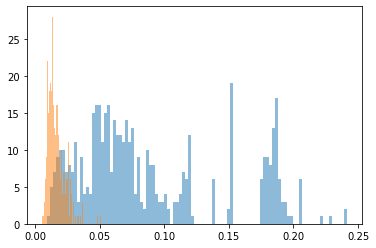

In [147]:
half_index = int(len(test_mae)*0.5)
plt.hist(test_mae[:half_index], bins=100, alpha=0.5)
plt.hist(test_mae[half_index:], bins=100, alpha=0.5)
plt.show()

# 학습 더 시도

In [148]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  

hist = model.fit(train_x, train_x, epochs=400, batch_size=256, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0182 - mape: 1773.0095 - val_loss: 0.0182 - val_mape: 3299.1763
Epoch 2/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0182 - mape: 1770.8916 - val_loss: 0.0184 - val_mape: 3402.2974
Epoch 3/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0182 - mape: 1770.5490 - val_loss: 0.0182 - val_mape: 3423.0112
Epoch 4/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0182 - mape: 1772.1532 - val_loss: 0.0182 - val_mape: 3291.9944
Epoch 5/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0182 - mape: 1773.3992 - val_loss: 0.0181 - val_mape: 3504.3325
Epoch 6/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0182 - mape: 1775.3140 - val_loss: 0.0183 - val_mape: 3519.0635
Epoch 7/400
998/998 [==============================] - 3s 3ms/step - loss: 0.0182 - mape: 1776.4575 - val_loss: 0.0182 - val_mape: 3314.2515
Epoch 8/400
9

## threshold 구하기

In [149]:
reconstructed = model.predict(train_x)

train_mae = np.mean(np.abs(reconstructed - train_x), axis=-1)
print(train_mae)

[0.00859964 0.01275114 0.01517627 ... 0.01176608 0.02130521 0.02520113]


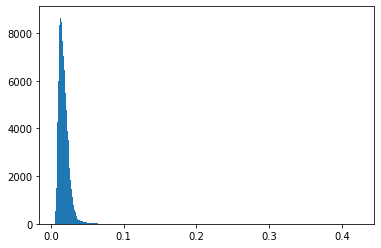

In [150]:
plt.hist(train_mae, bins=1000)
plt.show()

In [151]:
sorted_mae = np.sort(train_mae)
threshold_index = int(len(sorted_mae)*0.99)
threshold = sorted_mae[threshold_index]

print(threshold)

0.04236038596132588


## 테스트 데이터 모델 예측

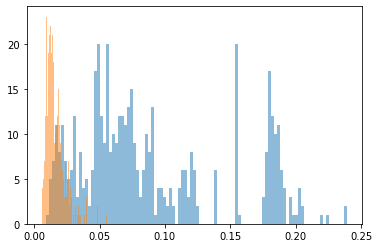

In [152]:
reconstructed = model.predict(test_x)
test_mae = np.mean(np.abs(reconstructed - test_x), axis=-1)

half_index = int(len(test_mae)*0.5)
plt.hist(test_mae[:half_index], bins=100, alpha=0.5)
plt.hist(test_mae[half_index:], bins=100, alpha=0.5)
plt.show()

In [153]:
predicted = (mae > threshold).astype(np.int)

n = len(test_data)
accuracy = (predicted == test_y).sum() / n

print("accuracy=", accuracy)

accuracy= 0.8984771573604061
